In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Lodaing the path to the folder
DATA_PATH = "/content/drive/MyDrive/studia/Inżynierka/MAIN/"

In [4]:
# Loading the prepared dataset
data = pd.read_csv(DATA_PATH + 'PreparedDataset.csv', low_memory=False)
data['Datetime'] = pd.to_datetime(data['Datetime'], utc=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Datetime  3481 non-null   datetime64[ns, UTC]
 1   Close     3481 non-null   float64            
 2   Returns   3481 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 81.7 KB
None


In [5]:
data.head()

,Datetime,Close,Returns
0,2022-12-12 17:30:00+00:00,26.840000,0.22
1,2022-12-12 18:30:00+00:00,26.965000,0.47
2,2022-12-12 19:30:00+00:00,27.200001,0.87
3,2022-12-12 20:30:00+00:00,27.299999,0.37
4,2022-12-13 14:30:00+00:00,27.719999,1.54


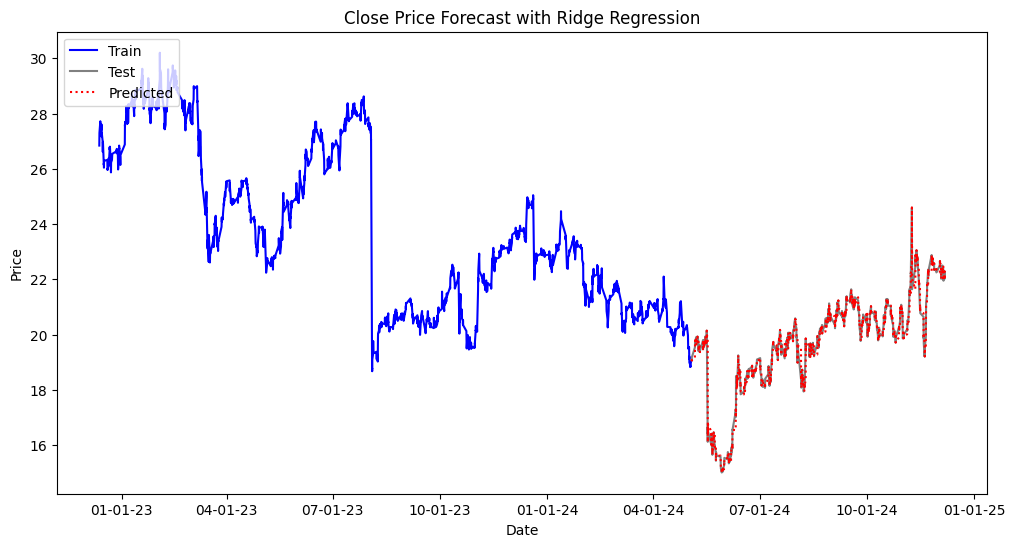

Mean Squared Error: 0.05
Root Mean Squared Error: 0.22
Mean Absolute Percentage Error: 0.61
Mean Absolute Error: 0.12


In [6]:
# Ridge Regression
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data_length = len(data)
train_size = int(data_length *0.7)
train = data['Returns'][0:train_size]
test = data['Returns'][train_size:]
test_length = len(test)
train_price = data['Close'][0:train_size]
test_price = data['Close'][train_size:]

# Parameter Reguralization Lambda (aplha lambda)
alpha = 5.0

history = [i for i in train]
predicted_returns = []

model = Ridge(alpha=alpha, solver="auto")

# Rolling forecast
for a in range(test_length):
  x_train = np.arange(len(history)).reshape(-1,1)
  y_train = np.array(history)

  # Fit ridge model
  model.fit(x_train, y_train)

  # Make predictions
  x_prediction = np.array([[len(history)]])
  y_prediction = model.predict(x_prediction)
  predicted_returns.append(y_prediction[0])

  # Update history
  history.append(test.iloc[a])

# Convertion of predicted returns into prices
predicted_prices = []
for i,predicted_return in enumerate(predicted_returns):
  new_price = test_price.iloc[i-1] if i>0  else train_price.iloc[-1]

  predicted_prices.append(new_price*(1 + predicted_return/100))

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(data.Datetime[:train_size], train_price, color="blue", label = "Train")
plt.plot(data.Datetime[train_size:], test_price, color="grey", label = "Test")
plt.plot(data.Datetime[train_size:], predicted_prices, label = "Predicted", color='red', linestyle=':')
ax=plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
plt.legend(loc='upper left')
plt.title("Close Price Forecast with Ridge Regression")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Calculate error metrics
mse = round(mean_squared_error(test_price, predicted_prices), 2)
rmse = round(np.sqrt(mse), 2)
mape = round(np.mean(np.abs((test_price - predicted_prices) / test_price)) * 100, 2)
mae = round(np.mean(np.abs(test_price - predicted_prices)), 2)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Absolute Error:', mae)



## EVALUATION OF ANALYSIS


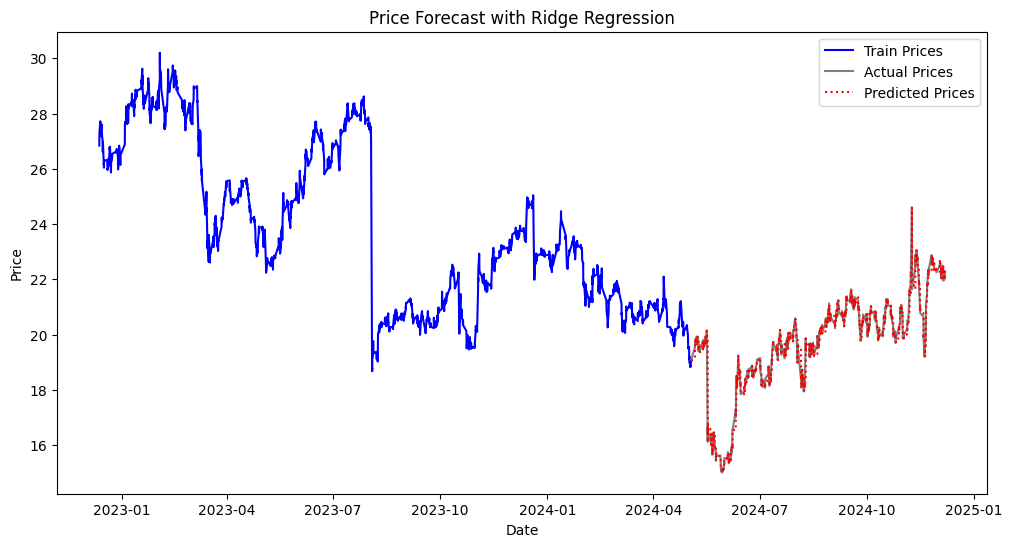

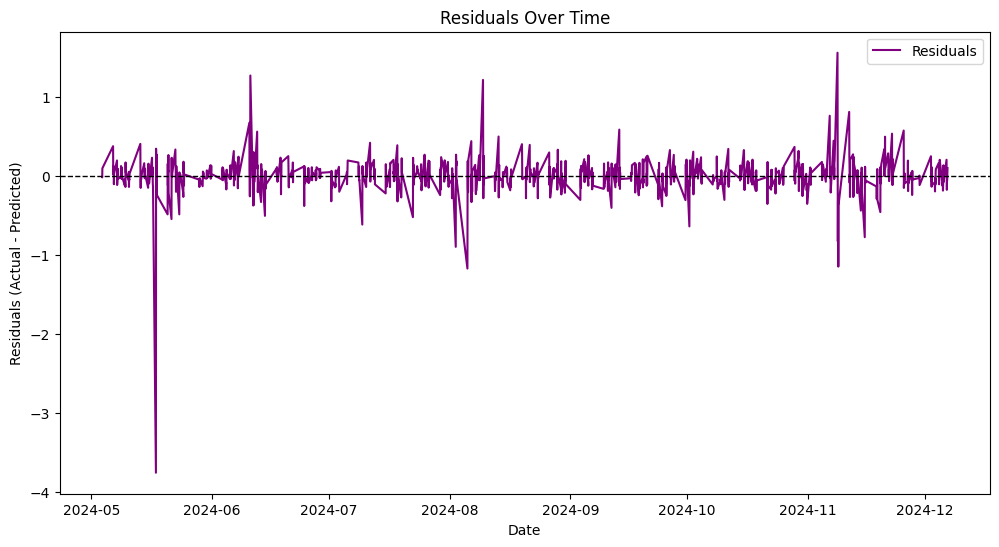

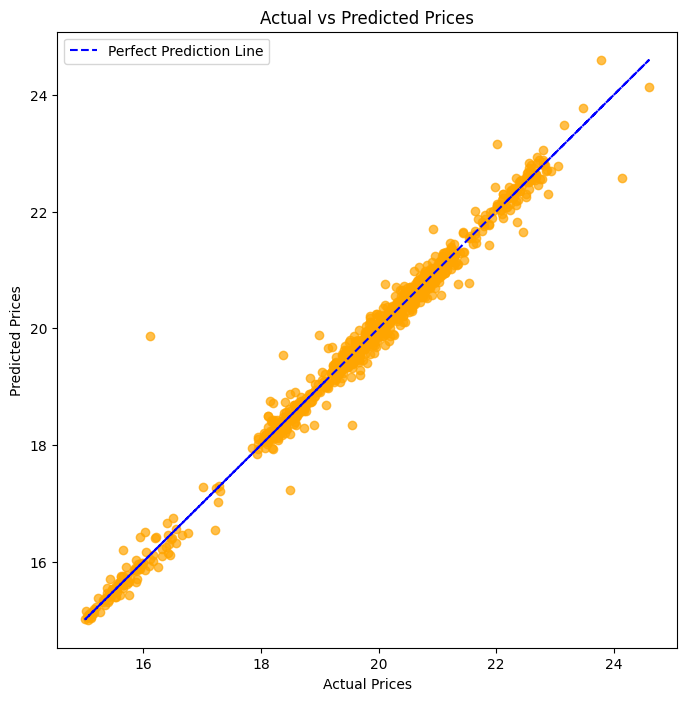

Evaluation Metrics:
Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.21
Mean Absolute Percentage Error (MAPE): 0.61
Mean Absolute Error (MAE): 0.12


In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Data preparation
data_length = len(data)
train_size = int(data_length * 0.7)
train = data['Returns'][0:train_size]
test = data['Returns'][train_size:]
test_length = len(test)
train_price = data['Close'][0:train_size]
test_price = data['Close'][train_size:]

# Parameter Regularization Lambda (alpha)
alpha = 5.0
history = [i for i in train]
predicted_returns = []

model = Ridge(alpha=alpha, solver="auto")

# Roll forecast
for a in range(test_length):
    x_train = np.arange(len(history)).reshape(-1, 1)
    y_train = np.array(history)

    # Fit ridge model
    model.fit(x_train, y_train)

    # Make predictions
    x_prediction = np.array([[len(history)]])
    y_prediction = model.predict(x_prediction)
    predicted_returns.append(y_prediction[0])

    # Update history
    history.append(test.iloc[a])

# Convert predicted returns into prices
predicted_prices = []
for i, predicted_return in enumerate(predicted_returns):
    new_price = test_price.iloc[i - 1] if i > 0 else train_price.iloc[-1]
    predicted_prices.append(new_price * (1 + predicted_return / 100))

# Error metrics
mse = mean_squared_error(test_price, predicted_prices)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_price - predicted_prices) / test_price)) * 100
mae = np.mean(np.abs(test_price - predicted_prices))

# Price Forecast Plot
plt.figure(figsize=(12, 6))
plt.plot(data.Datetime[:train_size], train_price, label="Train Prices", color="blue")
plt.plot(data.Datetime[train_size:], test_price, label="Actual Prices", color="grey")
plt.plot(data.Datetime[train_size:], predicted_prices, label="Predicted Prices", color="red", linestyle=":")
plt.title("Price Forecast with Ridge Regression")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Residual Plot
residuals = np.array(test_price) - np.array(predicted_prices)
plt.figure(figsize=(12, 6))
plt.plot(data.Datetime[train_size:], residuals, label="Residuals", color="purple")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("Residuals Over Time")
plt.xlabel("Date")
plt.ylabel("Residuals (Actual - Predicted)")
plt.legend()
plt.show()

# Predicted vs Actual Prices
plt.figure(figsize=(8, 8))
plt.scatter(test_price, predicted_prices, alpha=0.7, color="orange")
plt.plot(test_price, test_price, color="blue", label="Perfect Prediction Line", linestyle="--")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.show()

# Print Error Metrics
print("Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
